# Phase 4 Final Project

* Kevin Gross
* Part Time Flatiron School Student

# Real vs. Fake News Data Analysis

## General Overview

Once again, you are expected to communicate the results of an ML modeling process. Just like in Phase 3, we are looking for rationale, results, limitations, and recommendations.

In Phase 4, the emphasis is on the Jupyter Notebook. The notebook should include a summary at the beginning that briefly and accurately describes your process. The summary should be approximately 250 words -- about the size of a research paper abstract.

Summary elements:

Business and data understanding: what kind of data are you using, and what makes it well-suited for the business problem?
You do not need to include any data visualizations in your summary, but consider including relevant descriptive statistics

Data preparation: why did you choose the data preparation steps that you did, and what was the result?
This should be specific to the kind of data you are working with. For example, if you are doing an NLP project, what did you decide to do with stopwords?
Be sure to list the packages/libraries used to prepare the data, and why

Modeling: what modeling package(s) did you use, which model(s) within the package(s), and what tuning steps did you take?
For some projects there may be only one applicable package; you should still briefly explain why this was the appropriate choice
For neural networks projects, be sure to describe your model architecture choices

Evaluation: how well did your final model perform?
Include one or more relevant metrics
Be sure to briefly describe your validation approach

### Import the Necessary Packages and Load the Data

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

In [105]:
# Load the data
real_news = pd.read_csv('Data/True.csv')

# Preview the data
display(real_news.head())
print("True News Shape:", real_news.shape)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


True News Shape: (21417, 4)


In [106]:
real_news['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [107]:
# Load the data
fake_news = pd.read_csv('Data/Fake.csv')

# Preview the data
display(fake_news.head())
print("Fake News Shape:", fake_news.shape)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Fake News Shape: (23481, 4)


In [108]:
fake_news['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

### Data Understanding

#### Data Source

This dataset was pulled from [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv) and consists of over 40,000 articles, half of which are real and half of which are fake. 

#### Features

Prior to preprocessing, every row in the dataset contains 4 features:

* `title`: Title of the article
* `text`: Body of the article
* `subject`: The main subject of the article
* `date`: When the article was published

#### Target

As of now, each of the datasets do not include a target column. Let's add that in to each dataset and then combine the two into one large dataframe.

In [109]:
# Add in column consisting of the number 1 for true news
real_news['label'] = 1

# Add in column consisting of the number 0 for fake news
fake_news['label'] = 0

In [110]:
# Merge the two datasets
df = pd.concat([real_news, fake_news])

In [111]:
# Check for missing values
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## Exploratory Data Analysis

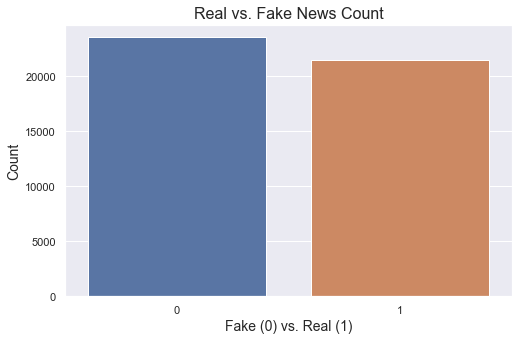

In [113]:
# Create the plot and set the theme
fig, ax = plt.subplots(figsize=(8,5))
sns.set_theme(style='darkgrid')

# Create the graph
sns.countplot(data=df, x=df['label'])

# Set our titles
ax.set_title('Real vs. Fake News Count', fontsize=16)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Fake (0) vs. Real (1)', fontsize=14)

# Save our figure for later
plt.savefig('Images/Real vs. Fake News Count.png');

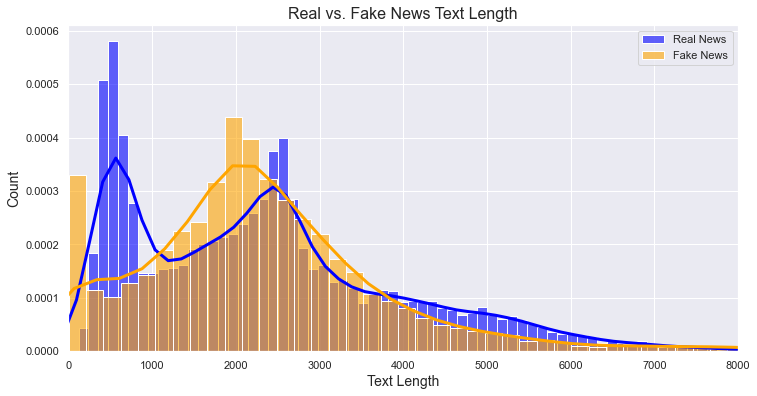

In [114]:
# Get word count of each text
real_len = df[df['label'] == 1]['text'].str.len()
fake_len = df[df['label'] == 0]['text'].str.len()

fig, ax = plt.subplots(figsize=(12,6))
plt.xlim(0, 8000)
sns.histplot(data=df, x=real_len, color='blue', bins=250, alpha=0.6, label='Real News', stat='density')
sns.histplot(data=df, x=fake_len, color='orange', bins=250, alpha=0.6, label='Fake News', stat='density')

sns.kdeplot(real_len, color='blue', linewidth=3)
sns.kdeplot(fake_len, color='orange', linewidth=3)

# Set our titles
ax.set_title('Real vs. Fake News Text Length', fontsize=16)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Text Length', fontsize=14)
plt.legend()

# Save our figure for later
plt.savefig('Images/Real vs. Fake News Text Length.png');

## Perform Data Cleaning

Before going any further, we'll complete two common data cleaning tasks for text data: standardizing case and tokenizing.

### Standardizing Case

In an NLP modeling process, sometimes we will want to preserve the original case of words (i.e. to treat `"It"` and `"it"` as different words, and sometimes we will want to standardize case (i.e. to treat `"It"` and `"it"` as the same word).

To figure out what we want to do, let's look at a sample from the data:

In [115]:
sample = df.iloc[6535]['text']
sample

'WASHINGTON (Reuters) - U.S. House Republicans on Tuesday reversed course and withdrew their proposal to weaken an outside ethics watchdog charged with investigating lawmakers’ behavior, House Speaker Paul Ryan spokeswoman AshLee Strong said. The move to abandon the plan comes just hours after U.S. President-elect Donald Trump criticized the move aimed at giving lawmakers greater control over the Office of Congressional Ethics. '

Here we have two references to the word "ethics". At the beginning, the article refers to ethics with a lowercase E. Then later, the article refers to the "Office of Congressional Ethics" with an uppercase E. It seems reasonable to assume that both of these should be treated as references to the same word instead of treating `"ethics"` and `"Ethics"` as two totally separate things. So let's standardize the case of all letters in this dataset.

The typical way to standardize case is to make everything lowercase. While it's possible to do this after tokenizing, it's easier and faster to do it first.

For a single sample, we can just use the built-in Python .lower() method:

In [116]:
sample = sample.lower()
sample

'washington (reuters) - u.s. house republicans on tuesday reversed course and withdrew their proposal to weaken an outside ethics watchdog charged with investigating lawmakers’ behavior, house speaker paul ryan spokeswoman ashlee strong said. the move to abandon the plan comes just hours after u.s. president-elect donald trump criticized the move aimed at giving lawmakers greater control over the office of congressional ethics. '

### Standardizing Case in the Full Dataset

To access this method in pandas, we use `.str.lower()`:

In [117]:
# Transform sample data to lowercase
df["text"] = df["text"].str.lower()

# Display full text
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",washington (reuters) - the head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington (reuters) - transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington (reuters) - the special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington (reuters) - trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattle/washington (reuters) - president donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st century wire says as 21wire reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st century wire says it s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,patrick henningsen 21st century wireremember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st century wire says al jazeera america will...,Middle-east,"January 14, 2016",0


As we can see, everything in the `text` column is now lowercase.

### Tokenizing

Now that the case is consistent it's time to convert each document from a single long string into a set of tokens.

Let's look more closely at the example from before:

In [118]:
sample

'washington (reuters) - u.s. house republicans on tuesday reversed course and withdrew their proposal to weaken an outside ethics watchdog charged with investigating lawmakers’ behavior, house speaker paul ryan spokeswoman ashlee strong said. the move to abandon the plan comes just hours after u.s. president-elect donald trump criticized the move aimed at giving lawmakers greater control over the office of congressional ethics. '

If we split this into tokens just by using the built-in Python `.split` string method, we would have a lot of punctuation attached. Punctuation being attached to words is a problem because we probably want to treat `said` and `said.` as two instances of the same token, not two different tokens.

In [119]:
sample.split()[23:33]

['lawmakers’',
 'behavior,',
 'house',
 'speaker',
 'paul',
 'ryan',
 'spokeswoman',
 'ashlee',
 'strong',
 'said.']

We are going to use the default token pattern that scikit-learn uses in its vectorizers. The RegEx looks like this:

> (?u)\b\w\w+\b

That means:

1. (?u): use full unicode string matching
2. \b: find a word boundary (a word boundary has length 0, and represents the location between non-word characters and word characters)
3. \w\w+: find 2 or more word characters (all letters, numbers, and underscores are word characters)
4. \b: find another word boundary

In other words, we are looking for tokens that consist of two or more consecutive word characters, which include letters, numbers, and underscores.

We'll use the `RegexpTokenizer` from NLTK to create these tokens, initially just transforming the sample:

In [120]:
basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
sample = tokenizer.tokenize(sample)

# Preview results
sample[21:31]

['lawmakers',
 'behavior',
 'house',
 'speaker',
 'paul',
 'ryan',
 'spokeswoman',
 'ashlee',
 'strong',
 'said']

### Tokenizing the Full Dataset

The way to tokenize all values in a column of a pandas dataframe is to use `.apply` and pass in `tokenizer.tokenize`.

In [125]:
# Create new column with tokenized data
df["text_tokenized"] = df["text"].apply(tokenizer.tokenize)

# Display full text
df

,title,text,subject,date,label,text_tokenized
0,"As U.S. budget fight looms, Republicans flip t...",washington (reuters) - the head of a conservat...,politicsNews,"December 31, 2017",1,"[washington, reuters, the, head, of, conservat..."
1,U.S. military to accept transgender recruits o...,washington (reuters) - transgender people will...,politicsNews,"December 29, 2017",1,"[washington, reuters, transgender, people, wil..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington (reuters) - the special counsel inv...,politicsNews,"December 31, 2017",1,"[washington, reuters, the, special, counsel, i..."
3,FBI Russia probe helped by Australian diplomat...,washington (reuters) - trump campaign adviser ...,politicsNews,"December 30, 2017",1,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,seattle/washington (reuters) - president donal...,politicsNews,"December 29, 2017",1,"[seattle, washington, reuters, president, dona..."
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st century wire says as 21wire reported earl...,Middle-east,"January 16, 2016",0,"[21st, century, wire, says, as, 21wire, report..."
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st century wire says it s a familiar theme. ...,Middle-east,"January 16, 2016",0,"[21st, century, wire, says, it, familiar, them..."
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,patrick henningsen 21st century wireremember ...,Middle-east,"January 15, 2016",0,"[patrick, henningsen, 21st, century, wireremem..."
23479,How to Blow $700 Million: Al Jazeera America F...,21st century wire says al jazeera america will...,Middle-east,"January 14, 2016",0,"[21st, century, wire, says, al, jazeera, ameri..."
